# 将线性函数$f(x)=w^{t} x$用作神经元激活函数的缺陷

神经网络中必须要有非线性的激活函数，无论是在隐层，还是输出层，或者全部都是。如果单用￼作为激活函数，无论多少层的神经网络会退化成一个线性回归，只不过是把他复杂化了。

# 激活函数的神经元与对率回归的联系

两者都是希望将连续值映射到{0,1}上，但由于阶跃函数不光滑，不连续的性质，所以才选择了sigmoid作为映射函数。不同之处在于激活函数不一定要使用sigmoid，只要是非线性的可导函数都可以使用。

# 学习率的取值对神经网络训练的影响。
如果学习率太低，每次下降的很慢，使得迭代次数非常多。  如果学习率太高，在后面迭代时会出现震荡现在，在最小值附近来回波动。

# 感知机

## 定义
假设输入空间是$\mathcal{X} \subseteq R^{n}$ 输出空间是$\mathcal{Y}=\{1,0\}$。输入$\boldsymbol{x} \in \mathcal{X}$表示实例的特征向量，对应于输入空间的点；输出$y \in \mathcal{Y}$表示实例的类别。由输入空间到输出空间的如下函数
$$
f(\boldsymbol{x})=\operatorname{sgn}\left(\boldsymbol{w}^{T} \boldsymbol{x}+b\right)
$$
成为感知机。其中$\boldsymbol{w}$和$b$为感知机模型参数，$sgn$是阶跃函数，即
$$
\operatorname{sgn}(z)=\left\{\begin{array}{ll}{1,} & {z \geqslant 0} \\ {0,} & {z<0}\end{array}\right.
$$

## 几何解释
线性方程$\boldsymbol{w}^{T} \boldsymbol{x}+b=0$对应于特征空间（输入空间）$R^{n}$中的一个超平面$S$,其中$\boldsymbol{w}$是炒藕平面的法向量，$b$是超平面的截距。这个超平面将特征空间划分为两个部分。位于两边的点（特征向量）分别被氛围正、负两类。因此，超平面$S$称为分离超平面。
![](./感知机.png)

## 算法

感知机学习算法是对以下最优化问题的算法，给定训练数据集  
$$
T=\left\{\left(\hat{\boldsymbol{x}}_{1}, y_{1}\right),\left(\hat{\boldsymbol{x}}_{2}, y_{2}\right), \cdots,\left(\hat{\boldsymbol{x}}_{N}, y_{N}\right)\right\}
$$
其中$\hat{\boldsymbol{x}}_{i} \in R^{n+1}$，$y_{i}\in\{1,0\}$求参数使其为以下损失函数极小化问题的解
$$
L(\hat{\boldsymbol{w}})=\sum_{\hat{\boldsymbol{x}}_{i} \in M}\left(\hat{y}_{i}-y_{i}\right) \hat{\boldsymbol{w}}^{T} \hat{\boldsymbol{x}}_{i}
$$
其中$M$为误分类点的集合。

# MLPClassifier

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05529723
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


f:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

Training set score: 0.986800
Test set score: 0.970000


[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

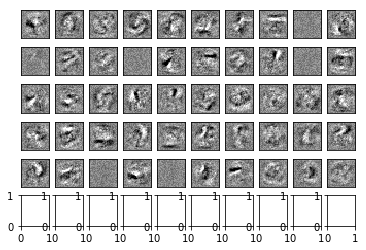

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(6, 10)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
